In [12]:
from project.survey import SurveyReader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_DIR = "../../ENAHO/"

excluded_years = {
    "2003", "2004", "2005", "2006", "2007", "2008", 
    "2009"
}
survey = SurveyReader(DATA_DIR, exclude_years=excluded_years)
survey.read_files()

# reporter = Reporter(survey)
# yearly_modules = reporter.yearly_modules()
# yearly_cols = reporter.modules_dims("cols")
# filenames = reporter.all_filenames()

In [13]:
q_names = [
    "P501",   # Last week were you employed?
    "P510",   # Kind of work performed
    "P5111",  # Sueldo
    "P5112",  # Salario
    "P5113",  # Comision
    "P5114",  # Destajo
    "P5115",  # Subvencion
    "P5116",  # Honorarios
    "P51112",  # Does NOT receive any kind of payment (1) 
    "P523",   # Frequency of payment
    "P524A1",  # Total income. 999999 missing value
    "P5295A",  # Frequency of health payments
    "P5295B",  # Amount paid in health payments. 999999 missing value
    "P5295C",  # Does not know
]
col = survey.data_columns("05", q_names).sample(50000)

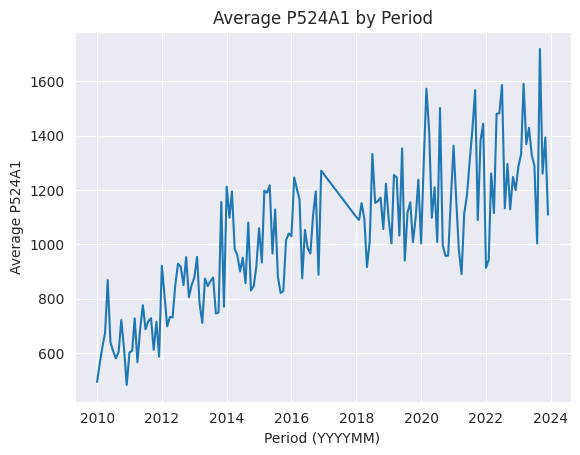

In [15]:
col["PERIODO"] = col["AÑO"]+col["MES"]
income = col[col['P524A1'].notna()]
income = income[income['P524A1']!= 999999]
average_by_period = income.groupby(['PERIODO'])['P524A1'].mean()
average_by_period.index = pd.to_datetime(average_by_period.index, format='%Y%m')
income = average_by_period.to_frame()
# Create a time series plot
sns.lineplot(x=average_by_period.index, y=average_by_period.values)
plt.xlabel('Period (YYYYMM)')
plt.ylabel('Average P524A1')
plt.title('Average P524A1 by Period')
plt.show()

<Axes: xlabel='PERIODO', ylabel='P524A1'>

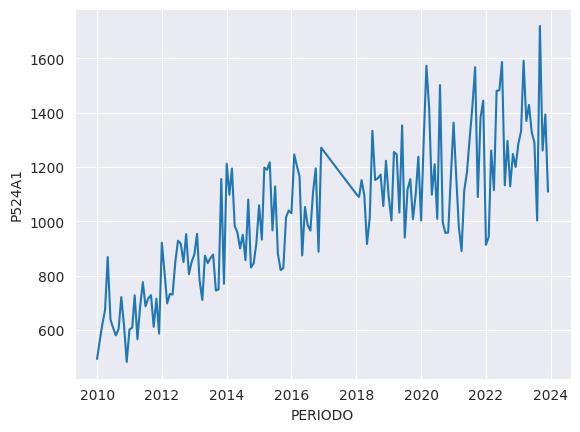

In [16]:
sns.lineplot(data=income, x="PERIODO", y="P524A1")

In [17]:
income

,P524A1
PERIODO,
2010-01-01,493.441176
2010-02-01,563.357143
2010-03-01,620.414286
2010-04-01,673.426230
2010-05-01,868.283784
...,...
2023-08-01,1002.574713
2023-09-01,1718.699115
2023-10-01,1260.043956


In [19]:
len(col[col["PERIODO"]=="201801"]["P524A1"])

357

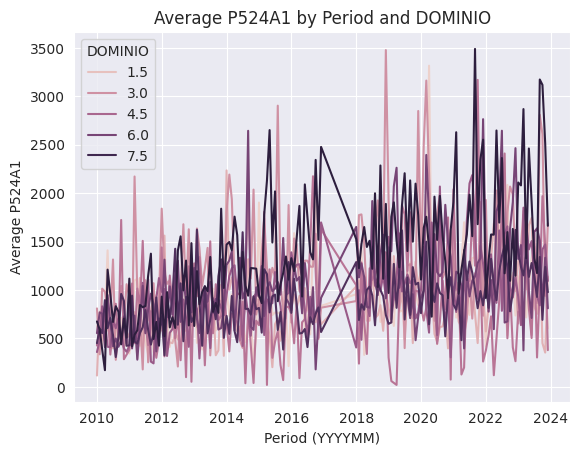

In [21]:
average_by_period_dominio = col.groupby(['PERIODO', "DOMINIO"])['P524A1'].mean()
x = [pd.to_datetime(level, format='%Y%m') for level in average_by_period_dominio.index.levels[0]]
levels = [x, average_by_period_dominio.index.levels[1]]
# Convert the period index to datetime format (assuming YYYYMM format)
average_by_period_dominio.index = average_by_period_dominio.index.set_levels(levels)
 
# # Reshape the Series to a long format for seaborn plot
df_plot = average_by_period_dominio.to_frame(name='P524A1').reset_index()
# 
# # Create the time series plot
sns.lineplot(x='PERIODO', y='P524A1', hue='DOMINIO', data=df_plot)
# 
# # Customize the plot (optional)
plt.xlabel('Period (YYYYMM)')
plt.ylabel('Average P524A1')
plt.title('Average P524A1 by Period and DOMINIO')
plt.show()

# df_plot = pd.melt(df_plot, id_vars='DOMINIO', var_name='period', value_name='P524A1')

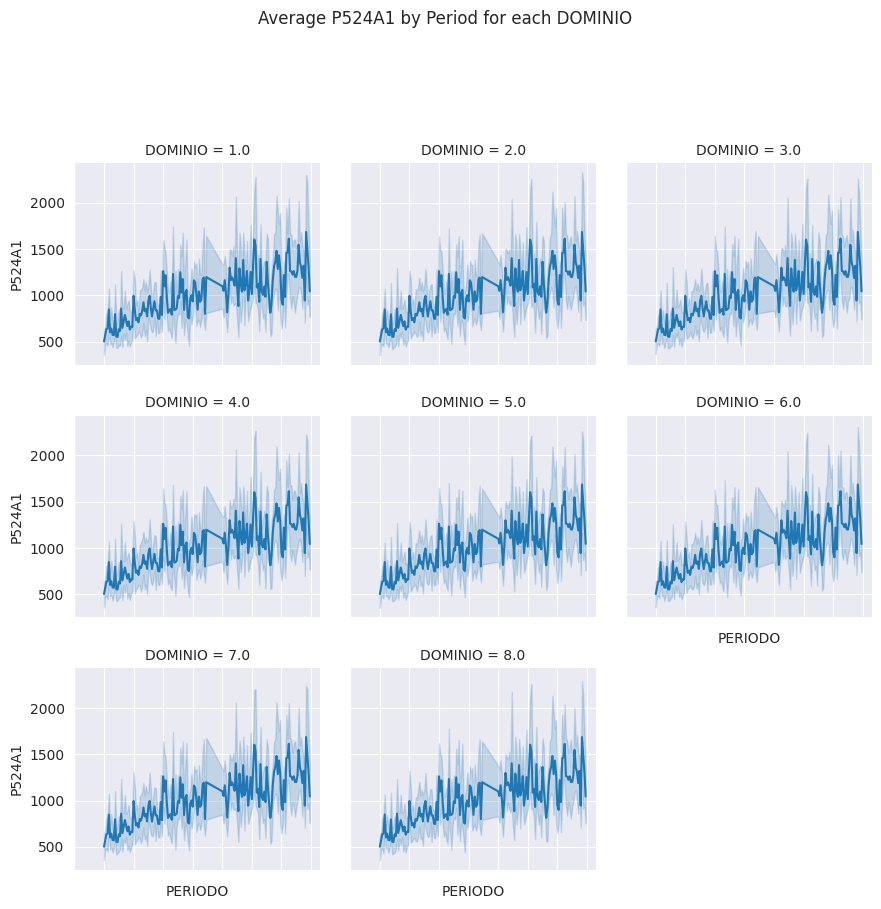

In [22]:
g = sns.FacetGrid(df_plot, col='DOMINIO', col_wrap=3)  # Adjust col_wrap for more DOMINIO values
# 
# # Create time series plot on each facet
g.map(sns.lineplot, x='PERIODO', y='P524A1', data=df_plot)
# 
# # Customize the plot (optional)
g.fig.suptitle('Average P524A1 by Period for each DOMINIO', y=1.02)  # Set common title
g.fig.subplots_adjust(top=0.85)  # Adjust spacing to prevent title cutoff
g.set_xticklabels(rotation=45)  # Rotate x-axis labels for readability
plt.show()